## Assignment-2 : Naive Bayes
### Name: PARTH UPADHYAY
### Roll: 25CS60R35
### Section: 2

## Set-up and Installations

In [1]:
# Installation requirements
!pip install scikit-learn pandas numpy matplotlib
!pip install seaborn

import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

# To fetch datasets from UCI repository
!pip install ucimlrepo


## Spambase Dataset(Odd Roll Numbers)

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
print(X.head())
print(y.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_;  \
0             0.00            0.00  ...                   0.0 

## Pre-Processing

In [3]:
# Create a train-test splits(80%-20%) and handle missing values
# Your Code Here
X.isnull().sum().sum(),y.isnull().sum().sum()



(np.int64(0), np.int64(0))

In [4]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Visualize the data

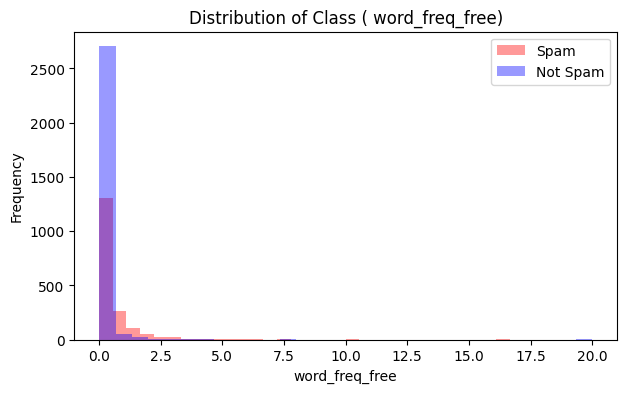

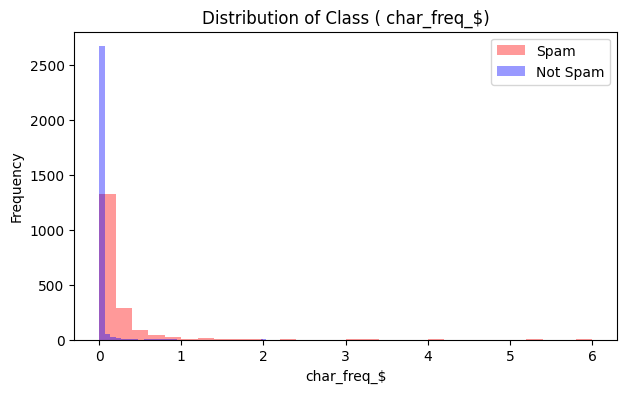

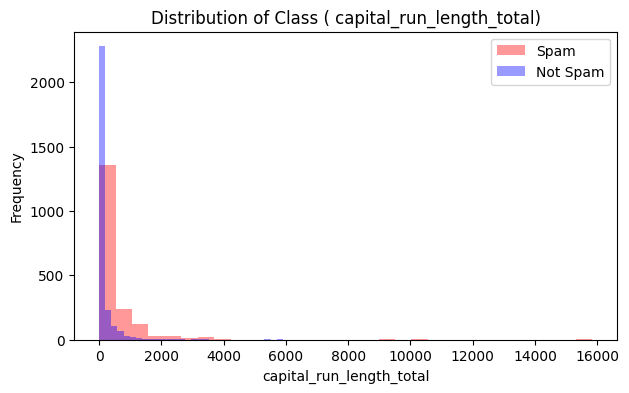

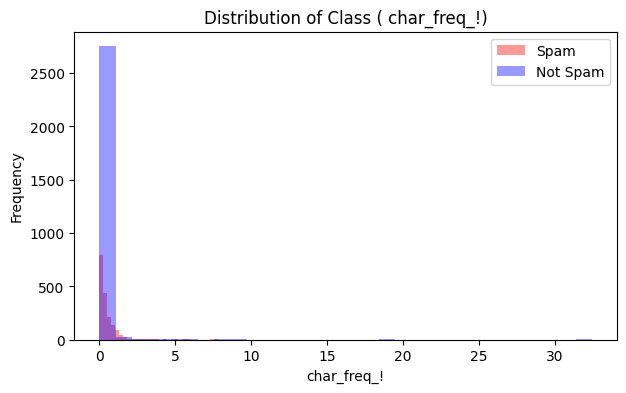

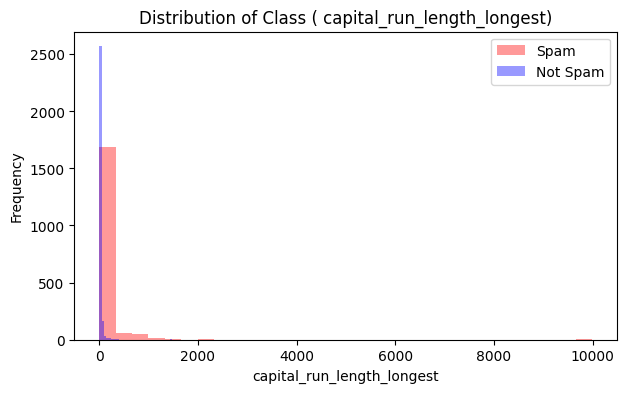

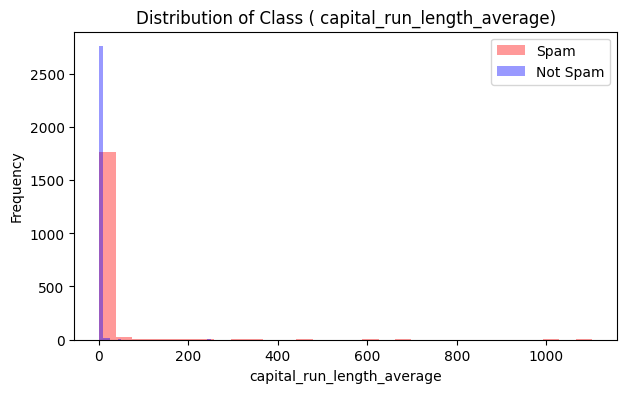

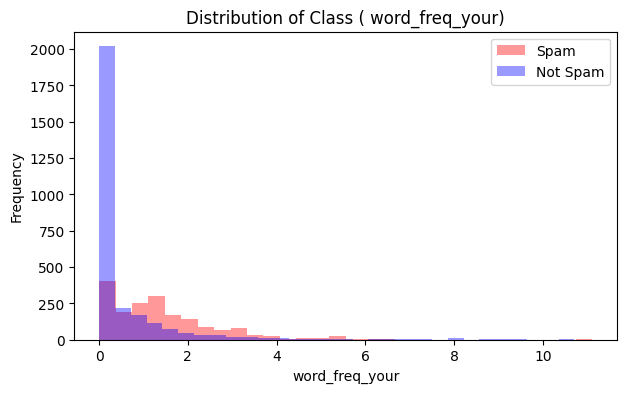

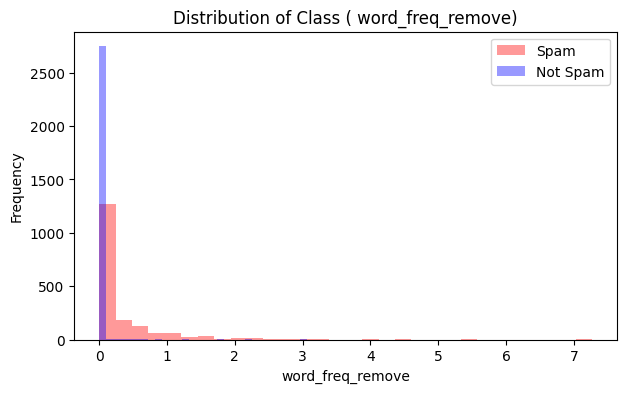

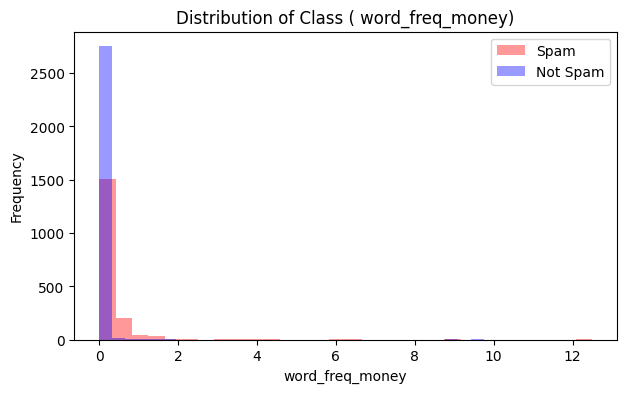

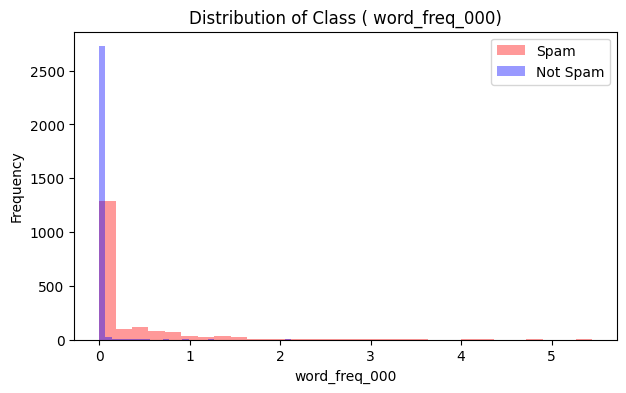

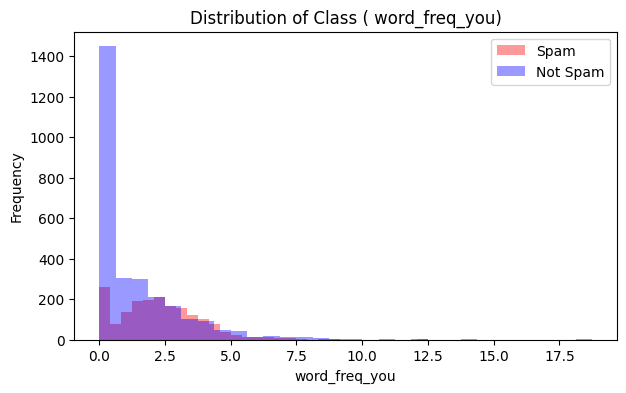

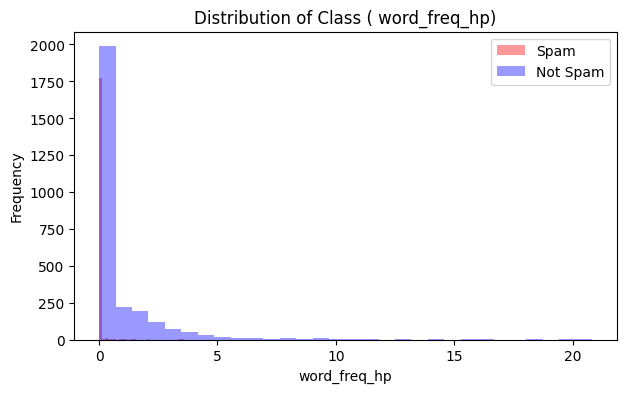

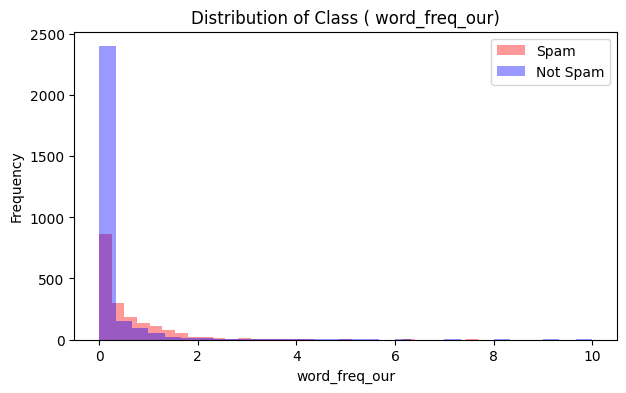

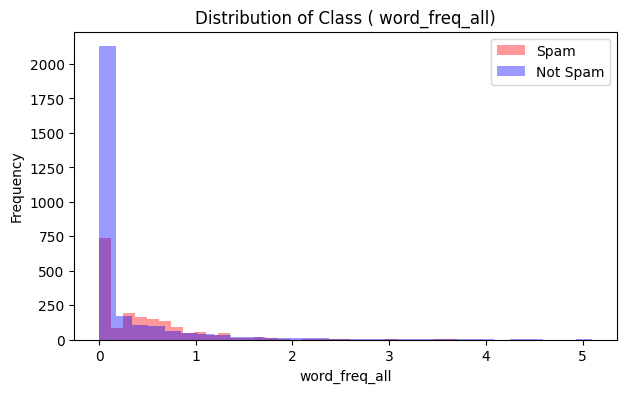

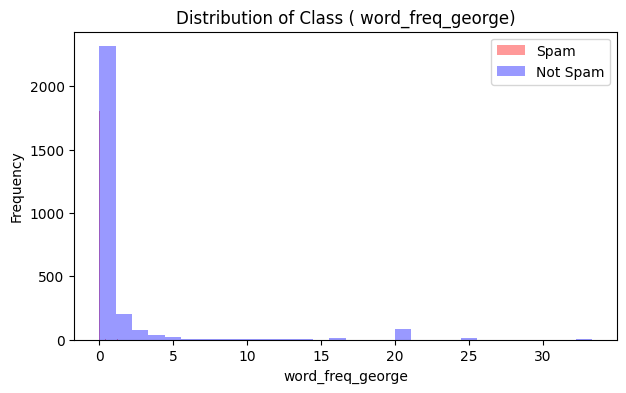

In [5]:
# Create histogram plots/Bar Charts(count plots) for at least three features 
# Your Code Here
df = pd.concat([X, y], axis=1)
mi = mutual_info_classif(X, y.values.ravel())
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
features=['word_freq_free','char_freq_$', 'capital_run_length_total']
top12 = [f for f in mi_series.index if f not in features][:12]

features_to_plot = features + top12
for value in features_to_plot:
    plt.figure(figsize=(7,4))
    plt.hist(df[df['Class'] == 1][value], bins=30, alpha=0.4, label='Spam', color='red')
    plt.hist(df[df['Class'] == 0][value], bins=30, alpha=0.4, label='Not Spam', color='blue')
    plt.title(f"Distribution of Class ( {value})")
    plt.xlabel(value)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


## Implement Naive Bayes from Scratch    

In [6]:
import numpy as np
import pandas as pd

class NaiveBayesClassifier:
    def __init__(self, alpha=1):
        self.alpha = alpha
        self.mean = {}         
        self.var_smooth = {}   
        self.class_priors = {} 
        self.labels = None
    # calculate Gaussian probability
    def gaussian_prob(self, mean, var_smooth, x_new):
        exponent = -0.5 * ((x_new - mean) ** 2) / var_smooth
        coeff = 1.0 / np.sqrt(2 * np.pi * var_smooth)
        return coeff * np.exp(exponent)
    # find mean, variance, and class priors 
    def fit(self, X, y):
        if isinstance(y, pd.DataFrame):
            y = y.iloc[:, 0] 
        self.labels = np.unique(y)
        for label in self.labels:
            X_label = X[y == label]
            self.mean[label] = X_label.mean().values
            self.var_smooth[label] = X_label.var().values + self.alpha
            self.class_priors[label] = len(X_label) / len(X)
    def predict(self, X):
        y_pred = []
        X_values = X.values  
        for x_new in X_values:
            class_probs = {}
            for label in self.labels:
                log_prob = np.log(self.class_priors[label])
                probs = self.gaussian_prob(self.mean[label], self.var_smooth[label], x_new)
                probs = np.clip(probs, 1e-30, None) 
                log_prob += np.sum(np.log(probs))
                class_probs[label] = log_prob
            
            y_pred.append(max(class_probs, key=class_probs.get))
        
        return np.array(y_pred)


## Visualization and Hyperparameter Tuning 

In [7]:
# Predict the y values for the test set using the best model
# Your Code Here

# Experiment with different hyperparameter values
alphas = [0.0001,0.001,0.01,0.1,1,10]
# Your Code Here
best_accu=0
for alpha in alphas:
    nb = NaiveBayesClassifier(alpha)
    nb.fit(x_train, y_train)
    y_pred=nb.predict(x_test)
    y_true = np.array(y_test).flatten()
    y_pred = np.array(y_pred).flatten()
    accuracy=np.sum(y_true==y_pred)
    if(accuracy > best_accu):
        best_accu=accuracy
        best_alpha=alpha
    print(f"accuracy of  {alpha} :  {accuracy / len(y_true)*100:.2f}")
    

accuracy of  0.0001 :  80.02
accuracy of  0.001 :  81.43
accuracy of  0.01 :  79.70
accuracy of  0.1 :  76.66
accuracy of  1 :  77.74
accuracy of  10 :  63.74


In [8]:
best_alpha

0.001

In [9]:
def confusion_matrix(y_true, y_pred):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    
    TP = np.sum((y_pred == 1) & (y_true == 1))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    
    return TP, FP, FN, TN

# Use the best alpha model
nb_best = NaiveBayesClassifier(best_alpha)


In [10]:
print('Test Data')
nb_best.fit(x_train, y_train)
y_pred_best = nb_best.predict(x_test)
TP, FP, FN, TN = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(f"TP: {TP}, FP: {FP}")
print(f"FN: {FN}, TN: {TN}")

Test Data
Confusion Matrix:
TP: 374, FP: 155
FN: 16, TN: 376


In [11]:
print('Train Data')
nb_best.fit(x_train, y_train)
y_pred_best = nb_best.predict(x_train)
TP, FP, FN, TN = confusion_matrix(y_train, y_pred_best)
print("Confusion Matrix:")
print(f"TP: {TP}, FP: {FP}")
print(f"FN: {FN}, TN: {TN}")

Train Data
Confusion Matrix:
TP: 1370, FP: 659
FN: 53, TN: 1598


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def compute_metrics(y_true, y_pred):
    """
    Compute accuracy, weighted precision, recall, F1 score manually
    """
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    labels = np.unique(y_true)
    
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    
    precision_sum = 0
    recall_sum = 0
    support_sum = 0
    
    for label in labels:
        TP = np.sum((y_pred == label) & (y_true == label))
        FP = np.sum((y_pred == label) & (y_true != label))
        FN = np.sum((y_pred != label) & (y_true == label))
        support = np.sum(y_true == label)
        
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        
        precision_sum += precision * support
        recall_sum += recall * support
        support_sum += support
    
    precision_weighted = precision_sum / support_sum
    recall_weighted = recall_sum / support_sum
    f1_weighted = 2 * (precision_weighted * recall_weighted) / (precision_weighted + recall_weighted) \
                  if (precision_weighted + recall_weighted) > 0 else 0
    
    return accuracy, precision_weighted, recall_weighted, f1_weighted


def analysis_train_test(X_train, y_train, X_test, y_test, alphas):
    metrics_train = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    metrics_test  = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

    for alp in alphas:
        nb = NaiveBayesClassifier(alpha=alp)
        nb.fit(X_train, y_train)
        
        # Predictions
        y_train_pred = nb.predict(X_train)
        y_test_pred  = nb.predict(X_test)
        
        # Compute metrics
        acc_tr, prec_tr, rec_tr, f1_tr = compute_metrics(y_train, y_train_pred)
        acc_te, prec_te, rec_te, f1_te = compute_metrics(y_test, y_test_pred)
        
        metrics_train['accuracy'].append(acc_tr)
        metrics_train['precision'].append(prec_tr)
        metrics_train['recall'].append(rec_tr)
        metrics_train['f1'].append(f1_tr)
        
        metrics_test['accuracy'].append(acc_te)
        metrics_test['precision'].append(prec_te)
        metrics_test['recall'].append(rec_te)
        metrics_test['f1'].append(f1_te)
        
        print(f"Alpha : {alp}")
        print(f"Train :\n Accuracy: {acc_tr*100:.2f}%\n Precision: {prec_tr*100:.2f}%\n Recall: {rec_tr*100:.2f}%\n F1: {f1_tr*100:.2f}%")
        print(f"Test  :\n Accuracy: {acc_te*100:.2f}%\n Precision: {prec_te*100:.2f}%\n Recall: {rec_te*100:.2f}%\n F1: {f1_te*100:.2f}%\n")
    plt.figure(figsize=(12, 10))
    for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
        plt.subplot(2, 2, i+1)
        plt.plot(alphas, metrics_train[metric], marker='o', label='Train')
        plt.plot(alphas, metrics_test[metric], marker='s', label='Test')
        plt.xscale('log')
        plt.xlabel('Alpha (smoothing parameter) ')
        plt.ylabel(metric.capitalize())
        plt.title(f'{metric.capitalize()} vs Alpha')
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.show()


Alpha : 0.0001
Train :
 Accuracy: 80.00%
 Precision: 84.94%
 Recall: 80.00%
 F1: 82.39%
Test  :
 Accuracy: 80.02%
 Precision: 84.02%
 Recall: 80.02%
 F1: 81.97%

Alpha : 0.001
Train :
 Accuracy: 80.65%
 Precision: 85.47%
 Recall: 80.65%
 F1: 82.99%
Test  :
 Accuracy: 81.43%
 Precision: 85.24%
 Recall: 81.43%
 F1: 83.29%

Alpha : 0.01
Train :
 Accuracy: 79.62%
 Precision: 85.12%
 Recall: 79.62%
 F1: 82.28%
Test  :
 Accuracy: 79.70%
 Precision: 84.15%
 Recall: 79.70%
 F1: 81.86%

Alpha : 0.1
Train :
 Accuracy: 76.88%
 Precision: 84.12%
 Recall: 76.88%
 F1: 80.34%
Test  :
 Accuracy: 76.66%
 Precision: 83.45%
 Recall: 76.66%
 F1: 79.91%

Alpha : 1
Train :
 Accuracy: 80.30%
 Precision: 81.10%
 Recall: 80.30%
 F1: 80.70%
Test  :
 Accuracy: 77.74%
 Precision: 79.55%
 Recall: 77.74%
 F1: 78.64%

Alpha : 10
Train :
 Accuracy: 68.02%
 Precision: 72.61%
 Recall: 68.02%
 F1: 70.24%
Test  :
 Accuracy: 63.74%
 Precision: 68.77%
 Recall: 63.74%
 F1: 66.16%



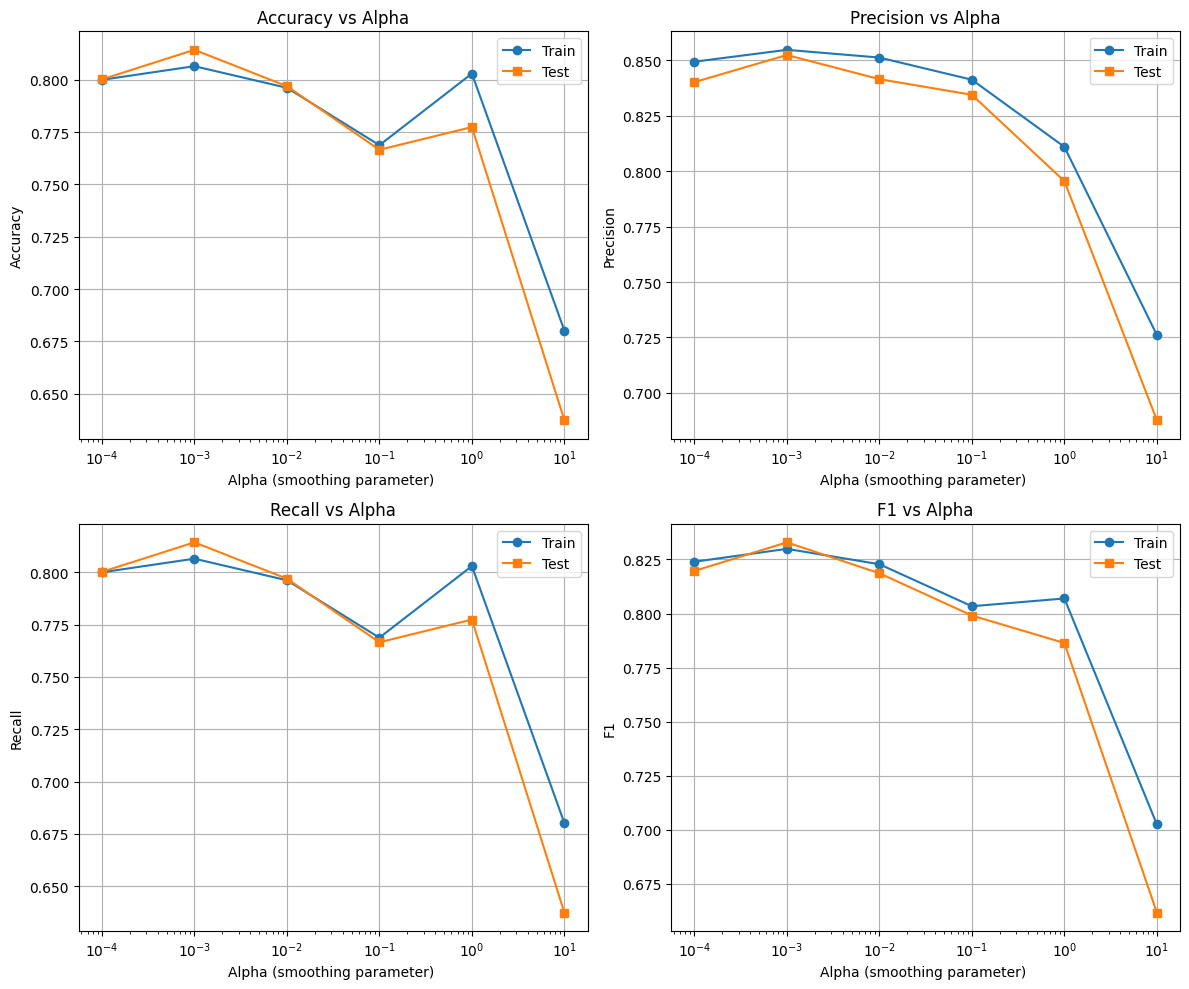

In [13]:
# Build a plot with alpha along the x-axis and training/test accuracy/recall/precision/F1 along the y-axis
# Your Code Here

analysis_train_test(x_train, y_train, x_test, y_test, alphas)



#### Explain which value of ‘a’ is most suitable for your dataset and why. 
#### Discuss how this smoothing parameter influences the model and helps prevent overfitting.

#### Best - alpha 0.001 
Very small α (0.0001) barely smooths the variance that leads to  model slightly overfits\
Moderate α (0.001) provides enough smoothing to stabilize Gaussian estimates which improves generalization.\
Too large α (0.1, 1, 10) overly inflates variance so features become less informative.


## Investigating the Independence Assumption

In [14]:
import pandas as pd

df = pd.concat([X, y], axis=1)

feature = 'char_freq_$'

def create_feature_duplicates(df, feature, n):
    df_new = df.copy()
    for i in range(1, n+1):
        df_new[f'copy{i}'] = df_new[feature]
    return df_new
df1 = create_feature_duplicates(df, feature, 1)
df2 = create_feature_duplicates(df, feature, 2)
df3 = create_feature_duplicates(df, feature, 3)
df4 = create_feature_duplicates(df, feature, 4)


In [15]:
def calc_(df, best_alpha):
    X = df.drop('Class', axis=1)
    Y = df['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    nb = NaiveBayesClassifier(best_alpha)
    nb.fit(x_train, y_train)
    y_test_pred = nb.predict(x_test)
    y_true_test = np.array(y_test).flatten()
    y_pred_test = np.array(y_test_pred).flatten()
    accuracy_test = np.sum(y_true_test == y_pred_test) / len(y_true_test)
    y_train_pred = nb.predict(x_train)
    y_true_train = np.array(y_train).flatten()
    y_pred_train = np.array(y_train_pred).flatten()
    accuracy_train = np.sum(y_true_train == y_pred_train) / len(y_true_train)
    return accuracy_test, accuracy_train

In [16]:
dic={}

In [17]:
# Iterative Training and Evaluation using the best hyperparameter 'a'
# Evaluate training/test accuracy/recall/precision/F1

# Dataset 0(Zero copy)
# Your Code Here
print("0 copy used")
accuracy1,accuracy2=calc_(df,best_alpha)
print(f"Test accuracy : {accuracy1*100:.2f}%")
print(f"Train accuracy : {accuracy2*100:.2f}%")
dic['0']={
    'test':accuracy1,
    'train':accuracy2
}

0 copy used
Test accuracy : 81.43%
Train accuracy : 80.65%


In [18]:
# Iterative Training and Evaluation using the best hyperparameter 'a'
# Evaluate training/test accuracy/recall/precision/F1

# Dataset 1(one copy)
# Your Code Here
print("1 copy used")
accuracy1,accuracy2=calc_(df1,best_alpha)
print(f"Test accuracy : {accuracy1*100:.2f}%")
print(f"Train accuracy : {accuracy2*100:.2f}%")
dic['1']={
    'test':accuracy1,
    'train':accuracy2
}


1 copy used
Test accuracy : 81.43%
Train accuracy : 80.95%


In [19]:
# Dataset 2(two copies)
# Your Code Here
print("2 copy used")
accuracy1,accuracy2=calc_(df2,best_alpha)
print(f"Test accuracy : {accuracy1*100:.2f}%")
print(f"Train accuracy : {accuracy2*100:.2f}%")
dic['2']={
    'test':accuracy1,
    'train':accuracy2
}


2 copy used
Test accuracy : 81.76%
Train accuracy : 81.25%


In [20]:
# Dataset 3(three copies)
# Your Code Here
print("3 copy used")
accuracy1,accuracy2=calc_(df3,best_alpha)
print(f"Test accuracy : {accuracy1*100:.2f}%")
print(f"Train accuracy : {accuracy2*100:.2f}%")
dic['3']={
    'test':accuracy1,
    'train':accuracy2
}


3 copy used
Test accuracy : 82.41%
Train accuracy : 81.49%


In [21]:
# Dataset 4(four copies)
# Your Code Here
print("4 copy used")
accuracy1,accuracy2=calc_(df4,best_alpha)
print(f"Test accuracy : {accuracy1*100:.2f}%")
print(f"Train accuracy : {accuracy2*100:.2f}%")
dic['4']={
    'test':accuracy1,
    'train':accuracy2
}


4 copy used
Test accuracy : 82.63%
Train accuracy : 81.63%


## Plot the results

[]

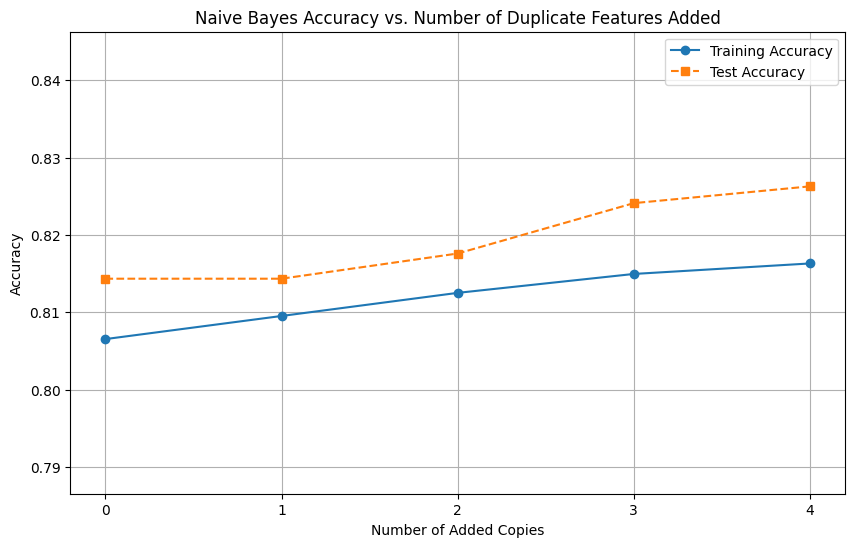

In [22]:
# Plot both the training/test accuracy/recall/precision/F1 as a function of the number of duplicate features added
# The x-axis should be the "Number of Added Copies" (0, 1, 2, 3, 4), and the y-axis should show the accuracy/recall/precision/F1.
# Your Code Here
num_copies_str = sorted(dic.keys())
num_copies = [int(k) for k in num_copies_str]
test_accuracies = [dic[k]['test'] for k in num_copies_str]
train_accuracies = [dic[k]['train'] for k in num_copies_str]

plt.figure(figsize=(10, 6))
plt.plot(num_copies, train_accuracies, marker='o', linestyle='-', label='Training Accuracy')
plt.plot(num_copies, test_accuracies, marker='s', linestyle='--', label='Test Accuracy')

plt.xlabel("Number of Added Copies")
plt.ylabel("Accuracy")
plt.title("Naive Bayes Accuracy vs. Number of Duplicate Features Added")
plt.xticks(num_copies) # Ensure ticks are at 0, 1, 2, 3, 4
plt.ylim(min(min(test_accuracies), min(train_accuracies)) - 0.02, max(max(test_accuracies), max(train_accuracies)) + 0.02) # Adjust y-limits based on data
plt.legend()
plt.grid(True)
plt.plot()

## Discussions
#### How does adding duplicate (and thus perfectly correlated) features affect the classifier's performance?
#### Explain this behavior by referencing the Naive Bayes decision rule.
#### What happens mathematically to the likelihood term when you add a copy of a feature?




#### In this dataset, the duplicated feature is strongly predictive, so reinforcing it helps Naive Bayes a little.
Qs 1)The model does not immediately overfit and confidence increases and accuracy rises.
this is not guaranteed generally .\  

Qs 2)The Naive Bayes decision rule selects the class 𝑦 that maximizes:

y^=argymax[logP(y)+∑logP(xi∣y)] 

Naive Bayes assumes all features xi are independent given the class.

Qs 3)
When a feature 𝑥𝑘 is duplicated, say we add an identical copy xk , the model treats it as an additional independent predictor, so the likelihood becomes:
logP(y)+[logP(xk∣y)+logP(xk′∣y)]+∑logP(xi∣y)

Since 𝑥𝑘=𝑥𝑘 we get,
logP(y)+2logP(xk∣y)+i=k∑logP(xi∣y)
So mathematically, adding a copy doubles the contribution of that feature to the decision rule.
In probability space (before taking logs), this means:
P(xk∣y)^2
Thus, Naive Bayes becomes overconfident in that feature, because it believes the same information twice.